In [1]:
# KI-Gilde
# QAware GmbH, Munich
# 11.3.2021
# revived 17.10.2025


from IPython.display import Image


### Getting Used to Dimensions

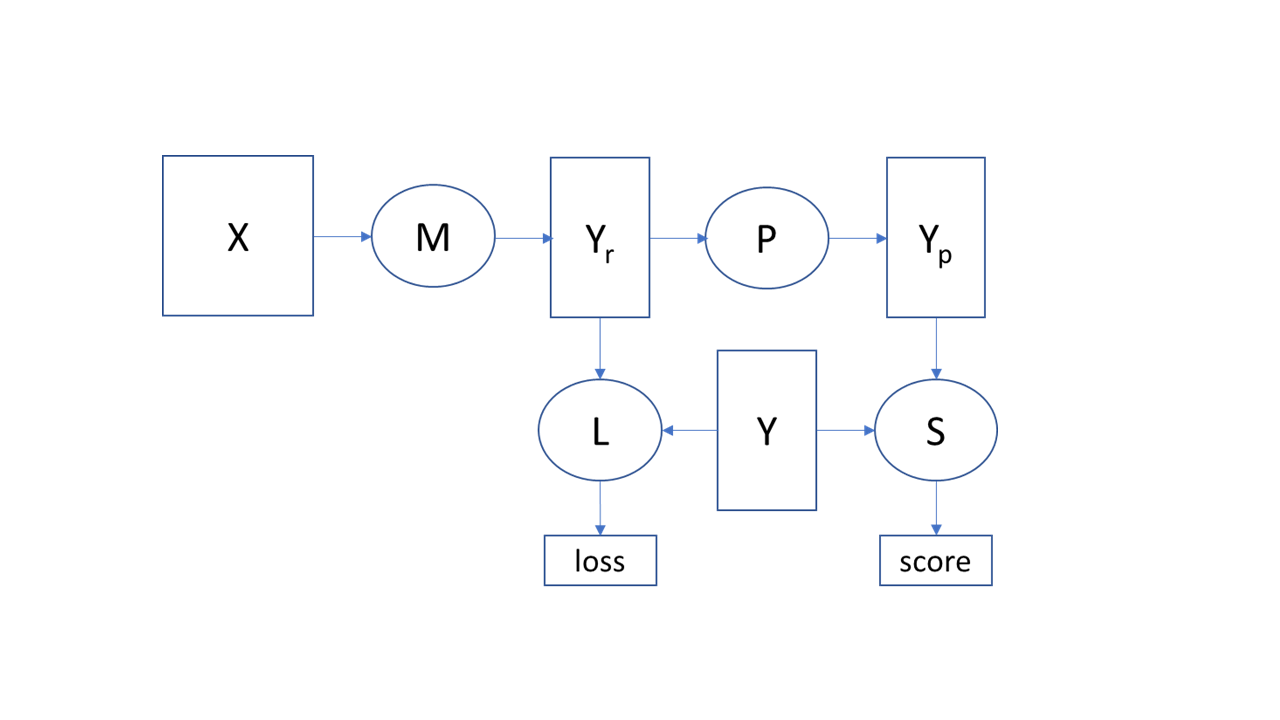

In [2]:
Image('../docs/pipeline.png')

There are the following variables:

* The feature matrix X. This is a real (m, n) Matrix. The number of columns is m, which is the size of the minibatch.
The number n of rows is the number of features.
* The vector of true labels Y. This a vector of m elements which can be real or integer
* The raw prediction Y_r.
* The prediction Y_p.
* The loss, whihc is a real scalar.
* The score, which contains accuracy, recall or whatever.

In [3]:
import torch
import torch.nn as nn
from torch import tensor

X_raw = [[0, 0], [0, 1], [1, 0], [1, 1]]
Y_raw = [0, 1, 1, 1]  # OR

### Exploring Mean Square Loss

`M(X: Tensor[float](m, n)) -> Y_p: Tensor[float](m, 1)`

`L(Y_p, Y: Tensor[float](m, 1)) -> loss: Tensor[float](0)`

`P(Y_p: Tensor[float](m, 1)) -> Y_q: Tensor[float](m, 1)`

In [4]:
M = nn.Sequential(nn.Linear(2, 1), nn.Sigmoid())
d1 = {'0.weight': tensor([[0., 0.]]), '0.bias': tensor([1.])}
M.load_state_dict(d1)
d2 = M.state_dict()
for k, v in d2.items():
    print(k, v)

loss_fct = nn.MSELoss()

X = tensor(X_raw, dtype=torch.float32)  # tensor[float](4, 2)
Y = tensor(Y_raw, dtype=torch.float32).view(-1, 1)  # tensor[float](4, 1)
Y_p = M(X)  # tensor[float](4, 1)
loss = loss_fct(Y_p, Y)  # tensor[float](0)
print(loss)

Y_q = torch.round(Y)  # tensor[float](4, 1)
print(Y_q)


0.weight tensor([[0., 0.]])
0.bias tensor([1.])
tensor(0.1879, grad_fn=<MseLossBackward>)
tensor([[0.],
        [1.],
        [1.],
        [1.]])


### Exploring Binary Cross Entropy Loss

`M(X: Tensor[float](m, n)) -> Y_p: Tensor[float](m, 1)`

`L(Y_p, Y: Tensor[float](m, 1)) -> loss: Tensor[float](0)`

`P(Y_p: Tensor[float](m, 1)) -> Y_q: Tensor[float](m, 1)`

In [5]:
M = nn.Linear(2, 1)
d1 = {'weight': tensor([[0., 0.]]), 'bias': tensor([1.])}
M.load_state_dict(d1)

loss_fct = nn.BCEWithLogitsLoss()
X = tensor(X_raw, dtype=torch.float32)  # tensor[float](4, 2)
Y = tensor(Y_raw, dtype=torch.float32).view(-1, 1)  # tensor[float](4, 1)
Y_p = M(X)  # tensor[float](4, 1)
loss = loss_fct(Y_p, Y)  # tensor[float](0)
print(loss)

Y_q = torch.heaviside(Y, torch.zeros(1))  # tensor[float](4, 1)
print(Y_q)

tensor(0.5633, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor([[0.],
        [1.],
        [1.],
        [1.]])


### Exploring Cross Entropy Loss

`M(X: Tensor[float](m, n)) -> Y_p: Tensor[float](m, 2)`

`L(Y_p: Tensor[float](m, 2), Y: Tensor[long](m)) -> loss: Tensor[float](0)`

`P(Y_p: Tensor[float](m, 2)) -> Y_q: Tensor[int](m)`

In [6]:
M = nn.Linear(2, 2)
d1 = {'weight': tensor([[0., 0.], [0., 0.]]), 'bias': tensor([1., 1.])}
M.load_state_dict(d1)

loss_fct = nn.CrossEntropyLoss()
X = tensor(X_raw, dtype=torch.float32)  # tensor[float](4, 2)
Y = tensor(Y_raw, dtype=torch.long)  # tensor[long](4)
Y_p = M(X)  # tensor[float](4, 2)
loss = loss_fct(Y_p, Y)  # tensor[float](0)
print(loss)

Y_q = torch.argmax(Y_p, dim=1)  # tensor[int](4)
print(Y_q)

tensor(0.6931, grad_fn=<NllLossBackward>)
tensor([0, 0, 0, 0])
